In [273]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier


In [274]:
data = pd.read_csv("bank-additional-full.csv", sep=';') #data is captured in the variable

Last Column of csv contains the results which is in form yes and no .                                      
Following code will convert the categorical data(last column) into 0 and 1.                                             
0 for No and
1 for yes

In [275]:
d={'no':0,'yes':1}
data['y']= data['y'].map(d)


We will take the last column out as label for our model

In [149]:
label = data['y']

In [150]:
data = data.drop(data.columns[-1],axis=1)

In [151]:
data  #raw data which needs preprocessing 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


Remaining categorical data needs to be get converted before training our model.                        
(1)_to dict will convert every row into dict.                                          
(2)fit_ transform method will transform the feature and its value into vector              
eg day = mon,tues... had only one column before fit_transform method after that it will have different column for each value of feature                                                                                 
(3)20 columns got converted to 64 columns                                                                     
(4)we can even use sklearn one hot vector

In [278]:
data_dict = data.T.to_dict().values()


In [279]:
v = DictVectorizer()
X = v.fit_transform(data_dict).toarray()
X_features = v.get_feature_names()


In [280]:
training_data = pd.DataFrame(X,columns = X_features) #training data is prepared here without label

In [281]:
training_data['y'] = label 

In [160]:
full_training_data = training_data #training data is prepared here with label

In [161]:
features = list(full_training_data.columns[:63])

In [162]:
y=full_training_data[full_training_data.columns[-1]]

x contains normalize features for training
y contans the corresponding response whether coustmer has joined or not

In [282]:
x=training_data[features] 

In [283]:
y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
41158    1
41159    1
41160    1
41161    0
41162    0
41163    1
41164    1
41165    1
41166    1
41167    0
41168    0
41169    0
41170    0
41171    1
41172    1
41173    1
41174    1
41175    0
41176    0
41177    0
41178    1
41179    0
41180    0
41181    1
41182    0
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [374]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Train and test split is performed in above code to measure the accuracy of the model


# Random Forest 

In [285]:
clf = RandomForestClassifier(n_estimators=100) #100 tress in the forest of classifier

In [286]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [287]:
t= clf.predict(x_test)
acc = accuracy_score(t,y_test)
acc

0.9157562515173586

Accuracy on crossfold validation 10 times with different test samples is executed using below code

In [168]:
scores=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')  

In [288]:
scores

array([0.90958738, 0.91289833, 0.90925645, 0.91168437, 0.91805766,
       0.91441578, 0.90591806, 0.91107739, 0.91411229, 0.92197936])

Importance of features in our model

Feature ranking:
1. feature 14 (0.279582)
2. feature 24 (0.090416)
3. feature 0 (0.080920)
4. feature 57 (0.044106)
5. feature 1 (0.039261)
6. feature 58 (0.032343)
7. feature 2 (0.027721)
8. feature 3 (0.024040)
9. feature 61 (0.022523)
10. feature 23 (0.022135)
11. feature 27 (0.013475)
12. feature 25 (0.013305)
13. feature 28 (0.012202)
14. feature 21 (0.012196)
15. feature 62 (0.011888)
16. feature 44 (0.011728)
17. feature 8 (0.011134)
18. feature 7 (0.010962)
19. feature 10 (0.010591)
20. feature 18 (0.010482)
21. feature 45 (0.010424)
22. feature 9 (0.010371)
23. feature 37 (0.009969)
24. feature 6 (0.009913)
25. feature 40 (0.009287)
26. feature 42 (0.008985)
27. feature 20 (0.008696)
28. feature 29 (0.008220)
29. feature 17 (0.007509)
30. feature 4 (0.007245)
31. feature 43 (0.007021)
32. feature 59 (0.006449)
33. feature 32 (0.006381)
34. feature 15 (0.006152)
35. feature 5 (0.006133)
36. feature 35 (0.006022)
37. feature 60 (0.005963)
38. feature 12 (0.005901)
39. feature 53

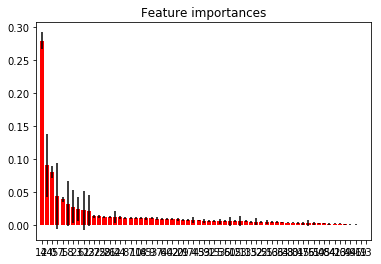

In [291]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

In [296]:
print(X_features[14],X_features[24],X_features[0],X_features[57],X_features[1],X_features[58])

duration euribor3m age nr.employed campaign pdays


Above are the main 5 features of the model lets optimize on this

Using Seaborn Library we are ploting the relationship between each feature and the result

D:\Anacondda\a\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


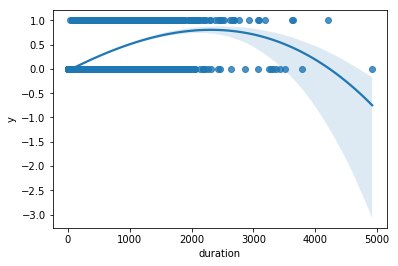

In [297]:
import seaborn as sns
%matplotlib inline
ax = sns.regplot(x="duration", y="y", order=3, data=full_training_data, truncate=True)


In [308]:
full_training_data.loc[(full_training_data['duration'] >3200) & (full_training_data['y']==1)]

,age,campaign,cons.conf.idx,cons.price.idx,contact=cellular,contact=telephone,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,...,month=nov,month=oct,month=sep,nr.employed,pdays,poutcome=failure,poutcome=nonexistent,poutcome=success,previous,y
7727,37.0,2.0,-36.4,93.994,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1
13820,31.0,1.0,-42.7,93.918,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,5228.1,999.0,0.0,1.0,0.0,0.0,1
22192,52.0,3.0,-36.1,93.444,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,5228.1,999.0,0.0,1.0,0.0,0.0,1


In [406]:
full_training_data.loc[(full_training_data['duration']>3200) & (full_training_data['y']==1 ) ]
# result= 462900/4640 = 99.76
print(3/4640) #0.0006

0.2727272727272727
0.000646551724137931


# This shows that call duration above 3200 sec that is 53 min has very low coversion of coustmer to yes                        
# 0.24% of optimization can be performed here by maintaining the call between 53 min and reducing the accuracy by 0.0006%

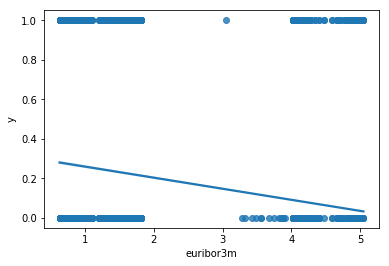

In [186]:
import numpy as np
ax = sns.regplot(x='euribor3m', y="y", order=1, data=full_training_data, truncate=True)

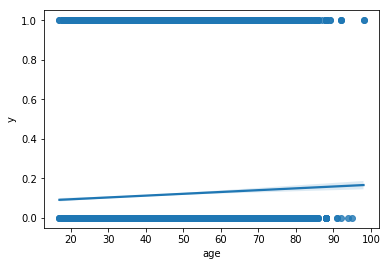

In [188]:
ax = sns.regplot(x="age", y="y", order=1, data=full_training_data, truncate=True)

No optimization can be performed on age as it has uniform output

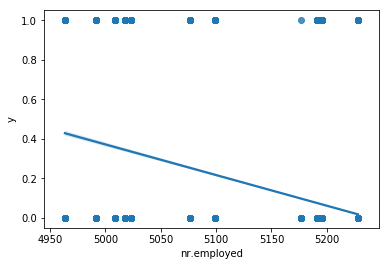

In [300]:
ax = sns.regplot(x="nr.employed", y="y", order=1, data=taining_data1, truncate=True)

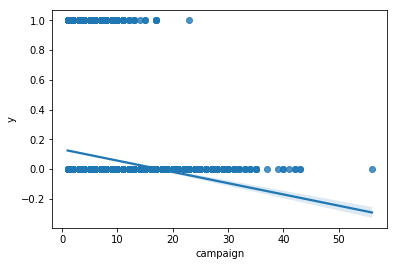

In [298]:
ax = sns.regplot(x="campaign", y="y", order=1, data=taining_data1, truncate=True)

In [416]:
full_training_data.loc[(full_training_data['campaign'] >17) & (full_training_data['y']==1)]

,age,campaign,cons.conf.idx,cons.price.idx,contact=cellular,contact=telephone,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,...,month=nov,month=oct,month=sep,nr.employed,pdays,poutcome=failure,poutcome=nonexistent,poutcome=success,previous,y
3219,39.0,23.0,-36.4,93.994,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1


In [417]:
full_training_data.loc[(full_training_data['campaign'] )]
#result = 4094200/41188
#99.4% 


,age,campaign,cons.conf.idx,cons.price.idx,contact=cellular,contact=telephone,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,...,month=nov,month=oct,month=sep,nr.employed,pdays,poutcome=failure,poutcome=nonexistent,poutcome=success,previous,y
1,57.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,0
1,57.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,0
1,57.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,0
1,57.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,0
1,57.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,0
1,57.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,0
1,57.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,0
1,57.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,0
1,57.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,0
1,57.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,0


# 0.6% optimization can be obtained by decreasing the sales 0.00000000002%

# major optimization can be performed here above analysis show no coustmer should be approached more than 17 times it has 0.1 conversion rate to yes

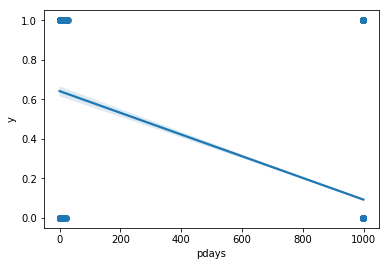

In [299]:
ax = sns.regplot(x="pdays", y="y", order=1, data=taining_data1, truncate=True)

# Random Forest gave accuracy of 92.1%

# Below code is to test the other model accuracy Answer ends here
# Neural Network
# LogisticRegression 
# SVM

# Logisitic regression


In [189]:
logreg.fit(x_train,y_train)

D:\Anacondda\a\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [190]:
scores_logisticreg=cross_val_score(logreg,x_train,y_train,cv=10,scoring='accuracy')

D:\Anacondda\a\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anacondda\a\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anacondda\a\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anacondda\a\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anacondda\a\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anacondda\a\lib\s

In [191]:
scores_logisticreg

array([0.90958738, 0.91016692, 0.90895296, 0.91016692, 0.9107739 ,
       0.91259484, 0.90743551, 0.91532625, 0.91441578, 0.91105039])

# Logistic Regression gave accuracy of 91.5%

# Neural Network

In [313]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

sess = tf.InteractiveSession()

D:\Anacondda\a\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [386]:
import matplotlib.pyplot as plt
input_images = tf.placeholder(tf.float32, shape=[None, 62])
target_labels = tf.placeholder(tf.float32, shape=[None, 1])

In [387]:
hidden_nodes = 512

input_weights = tf.Variable(tf.truncated_normal([62, hidden_nodes]))
input_biases = tf.Variable(tf.zeros([hidden_nodes]))

hidden_weights = tf.Variable(tf.truncated_normal([hidden_nodes, 1]))
hidden_biases = tf.Variable(tf.zeros([1]))

In [388]:
input_layer = tf.matmul(input_images, input_weights)
hidden_layer = tf.nn.relu(input_layer + input_biases)
digit_weights = tf.matmul(hidden_layer, hidden_weights) + hidden_biases

In [389]:
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=digit_weights, labels=target_labels))

In [390]:
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss_function)

In [391]:
correct_prediction = tf.equal(tf.argmax(digit_weights,1), tf.argmax(target_labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Reshaping training data

In [392]:
x_train= np.array(x_train)
y_train = np.array(y_train)
x_train = x_train.reshape(32950,63)
y_train = y_train.reshape(32950,1)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test = x_test.reshape(8238,63)
y_test = y_test.reshape(8238,1)

In [394]:
nduration_train = nduration_train.reshape(32950,62)
nage_train = nage_train.reshape(32950,62)
ncampaing_train = ncampain_train.reshape(32950,62)
nduration_test = nduration_test.reshape(8238,62)
nage_test = nage_test.reshape(8238,62)
ncampain_test = ncampain_test.reshape(8238,62)

Neural training without duration column

In [395]:
tf.global_variables_initializer().run()

for x1 in range(2000):
    #batch = mnist.train.n(100)
    optimizer.run(feed_dict={input_images: nduration_train, target_labels: y_train})
    if ((x1+1) % 100 == 0):
        print("Training epoch " + str(x1+1))
        print("Accuracy: " + str(accuracy.eval(feed_dict={input_images: nduration_test, target_labels: y_test})))

Training epoch 100
Accuracy: 1.0
Training epoch 200
Accuracy: 1.0
Training epoch 300
Accuracy: 1.0
Training epoch 400
Accuracy: 1.0
Training epoch 500
Accuracy: 1.0
Training epoch 600
Accuracy: 1.0
Training epoch 700
Accuracy: 1.0
Training epoch 800
Accuracy: 1.0
Training epoch 900
Accuracy: 1.0
Training epoch 1000
Accuracy: 1.0
Training epoch 1100
Accuracy: 1.0
Training epoch 1200
Accuracy: 1.0
Training epoch 1300
Accuracy: 1.0
Training epoch 1400
Accuracy: 1.0
Training epoch 1500
Accuracy: 1.0
Training epoch 1600
Accuracy: 1.0
Training epoch 1700
Accuracy: 1.0
Training epoch 1800
Accuracy: 1.0
Training epoch 1900
Accuracy: 1.0
Training epoch 2000
Accuracy: 1.0


Neural Training without age column

In [356]:
tf.global_variables_initializer().run()

for x1 in range(2000):
    optimizer.run(feed_dict={input_images: nage_train, target_labels: y_train})
    if ((x1+1) % 100 == 0):
        print("Training epoch " + str(x1+1))
        print("Accuracy: " + str(accuracy.eval(feed_dict={input_images: nage_test, target_labels: y_test})))

Training epoch 100
Accuracy: 1.0
Training epoch 200
Accuracy: 1.0
Training epoch 300
Accuracy: 1.0
Training epoch 400
Accuracy: 1.0
Training epoch 500
Accuracy: 1.0
Training epoch 600
Accuracy: 1.0
Training epoch 700
Accuracy: 1.0
Training epoch 800
Accuracy: 1.0
Training epoch 900
Accuracy: 1.0
Training epoch 1000
Accuracy: 1.0
Training epoch 1100
Accuracy: 1.0
Training epoch 1200
Accuracy: 1.0
Training epoch 1300
Accuracy: 1.0
Training epoch 1400
Accuracy: 1.0
Training epoch 1500
Accuracy: 1.0
Training epoch 1600
Accuracy: 1.0
Training epoch 1700
Accuracy: 1.0
Training epoch 1800
Accuracy: 1.0
Training epoch 1900
Accuracy: 1.0
Training epoch 2000
Accuracy: 1.0


Neural training with all features

No change is observed in neural net even after removing two major columns Accuracy is found to be 100

In [258]:
full_tr= np.array(full_training_data)
full_tr = full_tr.reshape(41188,64)

# SVM

In [266]:
from sklearn import svm


In [267]:
clf_svm = svm.SVC(gamma='scale')
clf_svm.fit(x_train, y_train) 

D:\Anacondda\a\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [268]:
t= clf_svm.predict(x_test)
acc = accuracy_score(t,y_test)

In [269]:
acc

0.9133284777858703

# Accuracy of SVM is found to be 91.3%

# Optimization can be done on Duration of call and campain(number of times coustmer approached) that is 0.15% with a reduction of sale to 0.0%